In [ ]:
import qiskit 
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qiskit.providers.basic_provider import BasicSimulator

def run_circ(qc):
    backend = BasicSimulator()
    # If you do not specify the number of shots, the default is 1024
    qc_trans = qiskit.transpile(qc,backend=backend)
    result = backend.run(qc_trans, shots=2000,memory=True).result()   
    
    # Extract the counts of 0 and 1 measurements
    counts = result.get_counts()               
    return result


# The limits of current quantum computers for running algorithms


## QFT -- Quantum fourie transform 
+ Important cornerstone for many algorithms:
    + Shor: prime factoring
    + Faze estimation: estimate the eigenvalue of uniter transformations
    + HHL (Harrow-Hassidim-Lloyd): solve linear equation systems 
+ Transform a state into fourier base

## Exercise: Intro to QFT

In [ ]:
num_qubits = 10
# create the circuit with 'num_qubits' amount of qubits!
qc = 

# Create the QFT circuit
qft = 
qft.draw()

In [ ]:
# Add the QFT circuit to the perviously create circuit and add measurments
qc = 

# Run the circuit 
counts=
plot_histogram(counts)

In [ ]:
# Create a circuit that converts a state into fourier basis and back using the last example
qc =
qc.draw()

In [ ]:
# Try out the circuit 

counts=run_circ(qc).get_counts()
plot_histogram(counts)

## QPE -- Quantum phase estimation
+ Key part in molecular simulations and Shor algorithm 
+ Calculate the eigenvalue of a unitary 
+ Uses phasekickback: 


![](kepek/Picture2.png)

where $|\pi_3\rangle = |\psi\rangle \otimes \left(\frac{1 + e^{2\pi i\theta}}{2}|0\rangle + \frac{1 - e^{2\pi i\theta}}{2}|1\rangle\right)$

## Estimate the phase of the P gate
+ The matrix of the P gate is: $P(\phi) = \begin{pmatrix} 
1 & 0 \\
0 & e^{i\phi}
\end{pmatrix}$
+ in phase estimation we estimate: 
+ $\lambda$ using: $\phi=2*\pi*\lambda$

In [ ]:
num_qubits = 5
theta = 1/3
# Use the PhaseEstimation object to estimate the phase of the P gate  
qc = 
phase_qc.decompose().draw()

In [ ]:
# Add the measurments
qc.compose(phase_qc,inplace=True)
qc.measure(range(num_qubits-1),range(num_qubits-1))
qc.draw()

In [ ]:
# Run the circuit 
counts=run_circ(qc).get_counts()
plot_histogram(counts)

In [ ]:
# Evaluate the results
most_probable = max(counts, key=counts.get)
integer = int(most_probable, 2)
print(f"{integer}")
print(f"Estimated value: {integer/(2**(num_qubits-1))}")

## Improving estimation 
+ Estimated value: $\theta=\frac{y}{m^2}$ 
    + $y\in [0,m^2]$ 
    + m: number of qubits


In [ ]:
theta = 1/np.e
import timeit
estimations = []
runtime = []
circ_compile_time = []

for num_qubits in range(3,24):
    start = timeit.default_timer()
    qc = qiskit.QuantumCircuit(num_qubits,num_qubits)
    qc.x(num_qubits-1)
    gate = qiskit.circuit.library.PhaseGate(2*np.pi*theta)
    phase_qc = qiskit.circuit.library.PhaseEstimation(num_qubits-1,gate,iqft=qiskit.circuit.library.QFT(num_qubits-1,inverse=True))
    qc.compose(phase_qc,inplace=True)
    qc.measure(range(num_qubits-1),range(num_qubits-1))
    
    circ_time = timeit.default_timer()
    
    counts=run_circ(qc).get_counts()
    most_probable = max(counts, key=counts.get)
    integer = int(most_probable, 2)
    t_est = integer/(2**(num_qubits-1))
    estimations.append(t_est)
    end = timeit.default_timer()
    
    
    runtime.append(end-circ_time)
    circ_compile_time.append(circ_time-start)




In [ ]:
plt.plot(range(3,24),estimations)

In [ ]:
plt.plot(range(3,24),circ_compile_time)
plt.plot(range(3,24),runtime)


In [ ]:
error = [abs(x-1/np.e)  for x in estimations] 

In [ ]:
plt.plot(range(3,24),error)

## Why don't we already using this?
+ Number of usable quantum bits
+ Coherence of quantum bits
+ Simulation is hard, exponential memory usage
+ Main stats of algorithms:
    + Needed qubits 
    + Depth of circuit
    + Fidelity: how close we get to the expected value   

In [ ]:
import OtherStuff.pe_benchmark as pe_benchmark

min_qubits=2
max_qubits=10
skip_qubits=1
max_circuits=3
num_shots=1000
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {"resilience_level":0,"optimization_level": 0}

backend_id="qasm_simulator"
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)



In [ ]:
import OtherStuff.shors_benchmark as shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
from qiskit_ibm_runtime. fake_provider. backends.brisbane.fake_brisbane import FakeBrisbane
service = QiskitRuntimeService(channel="ibm_quantum",
    token="7bcf0acfd0dfeb458c9832c2364c9e092756a9359e3b67a230a06a366144a354d90003fbdd0d85e775adff77ba3bb34cc5e68b57b63a80ba85d40bd2f092248d")

service.backends()

In [ ]:
backend = service.backend("ibm_sherbrooke")
backend

In [ ]:
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
from qiskit_ibm_runtime. fake_provider. backends.brisbane.fake_brisbane import FakeBrisbane
import OtherStuff.pe_benchmark as pe_benchmark


min_qubits=20
max_qubits=22
skip_qubits=1
max_circuits=1
num_shots=1000
hub="ibm-q"; group="open"; project="main"
provider_backend = backend
exec_options = {}

backend_id=str(provider_backend.name)
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)




## Simulate using data from real quantum computers

In [ ]:
# Hasznalt
from qiskit_ibm_runtime. fake_provider. backends.sherbrooke.fake_sherbrooke import FakeSherbrooke
# Heron R1 
from qiskit_ibm_runtime. fake_provider. backends.torino.fake_torino import FakeTorino
from qiskit_ibm_runtime.fake_provider.backends.almaden.fake_almaden import FakeAlmadenV2
from qiskit_ibm_runtime.fake_provider.backends.manhattan.fake_manhattan import FakeManhattanV2
from qiskit_ibm_runtime.fake_provider.backends.casablanca.fake_casablanca import FakeCasablancaV2
import OtherStuff.pe_benchmark as pe_benchmark


In [ ]:

min_qubits=2
max_qubits=10
skip_qubits=1
max_circuits=3
num_shots=1000
hub="ibm-q"; group="open"; project="main"
provider_backend = FakeSherbrooke()

backend_id=str(provider_backend.name)
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

## Choosing the next QPU to test:
+ Falcon R4 Processors (7): FakeCasablancaV2
+ Falcon Processor (27): FakeAlmadenV2
+ Hummingbird Processors (65): FakeManhattanV2
+ !Eagle Processors (127): FakeSherbrooke
+ !Heron R1 (156): FakeTorino

In [ ]:
provider_backend = FakeSherbrooke()
backend_id=str(provider_backend.name)
exec_options = {"resilience_level":0,"optimization_level": 0}

pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

## Solution: Resilience 

Levels: 
+ 0 -- No correction
+ 1 -- Minimal error correction: readout error reduction using TREX (Twirled Readout Error eXtinction) 
+ 2 -- level 1 + ZNE (Zero noise extrapolation)


In [ ]:
min_qubits=2
max_qubits=12
skip_qubits=1
max_circuits=3
provider_backend = FakeSherbrooke()
exec_options = {"resilience_level":1,"optimization_level": 3}
backend_id=str(provider_backend.name)
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

## Qiskit transpiler: 

![alt text](transpiling_core_steps.avif)


+ init 
+ **layout**
+ **routing**
+ translation 
+ **optimization**
+ scheduling

 

## Problem1:

In [ ]:
qiskit.circuit.library.QFT(10).decompose().draw()

![](kepek/qmem.png)

## Solution?
## Transpiler: layout

Transpile the circuit to the selected QPU architecture  


![alt text](mapping.avif)


In [ ]:
from qiskit.visualization import plot_circuit_layout
from qiskit.providers.fake_provider import Fake27QPulseV1
backend = Fake27QPulseV1()
qc_orig = qiskit.circuit.library.PhaseEstimation(10,qiskit.circuit.library.PhaseGate(2*np.pi))
qc_layout = qiskit.transpile(qc_orig,backend=backend,optimization_level=0,routing_method=None)

plot_circuit_layout(qc_layout,backend)


## Problem2: Neighbourhood 

In [ ]:
qc_test = qiskit.QuantumCircuit(15)
qc_test.h(0)
for i in range(1,15):
    qc_test.cx(0,i)

qc_test.measure_all()
qc_test.draw()

In [ ]:
qc_routed = qiskit.transpile(qc_test,backend=backend,optimization_level=0)
plot_circuit_layout(qc_routed,backend)

## Soution: Routing
+ Swap gates
+ SabreSwap algorithm to find a good but not perfect solution

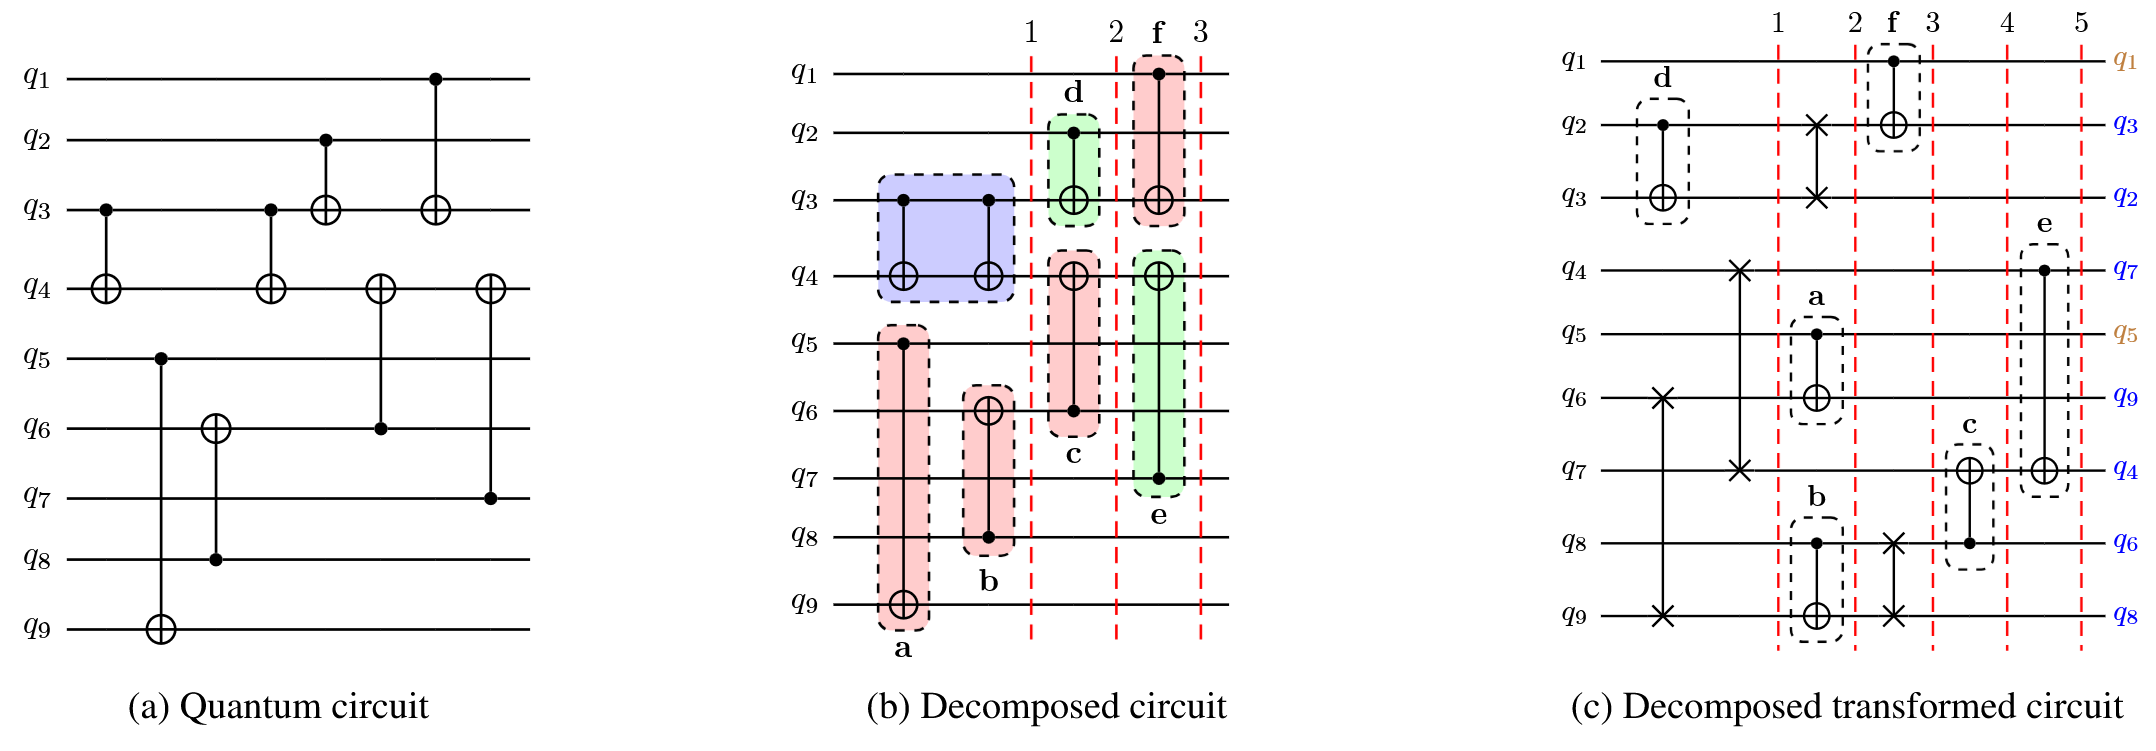

In [ ]:
qc_routed.draw(fold=-1,idle_wires=False)

## Optimization layer
+ 3 levels
+ Main objective: reduce the depth of the circuit -> lower depth -> faster runtime  -> lower ammount of errors

In [ ]:
qiskit.transpile(qc_test,backend=backend,optimization_level=3).draw(fold=-1,idle_wires=False)

In [ ]:
ghz = qiskit.QuantumCircuit(15)
ghz.h(0)
ghz.cx(0, range(1, 15))
 
depths = []
gate_counts = []
non_local_gate_counts = []
levels = [str(x) for x in range(4)]
for level in range(4):
     circ = qiskit.transpile(ghz, backend, optimization_level=level)
     depths.append(circ.depth())
     gate_counts.append(sum(circ.count_ops().values()))
     non_local_gate_counts.append(circ.num_nonlocal_gates())
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.bar(levels, depths, label='Depth')
ax1.set_xlabel("Optimalization level")
ax1.set_ylabel("Depth")
ax1.set_title("Circuit output Depth")
ax2.bar(levels, gate_counts, label='Number of gates')
ax2.bar(levels, non_local_gate_counts, label='Non-local gates')
ax1.set_xlabel("Optimalization level")
ax2.set_ylabel("Number of gates")
ax2.legend()
ax2.set_title("Output circuit number of gates")
fig.tight_layout()
plt.show()